In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Chargement des données
data = pd.read_csv('anomalies.csv')


In [2]:
# Prétraitement des données
# Encoder les variables catégorielles
le_weather = LabelEncoder()
data['Weather'] = le_weather.fit_transform(data['Weather'])

# Séparation des features et de la cible
X = data[['Weather', 'ChargingLevel', 'ChargingSpeed', 'DateTime']]
y = data['Result']

In [3]:

# Convertir DateTime en valeurs numériques que le modèle peut traiter
X['DateTime'] = pd.to_datetime(X['DateTime'])
X['Month'] = X['DateTime'].dt.month
X['Day'] = X['DateTime'].dt.day
X['Hour'] = X['DateTime'].dt.hour
X = X.drop('DateTime', axis=1)


C:\Users\khali\AppData\Local\Temp\ipykernel_2764\3450295266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DateTime'] = pd.to_datetime(X['DateTime'])


In [4]:

# Encoder les variables catégorielles supplémentaires
le_month = LabelEncoder()
le_day = LabelEncoder()
le_hour = LabelEncoder()

X['Month'] = le_month.fit_transform(X['Month'].astype(str))
X['Day'] = le_day.fit_transform(X['Day'].astype(str))
X['Hour'] = le_hour.fit_transform(X['Hour'].astype(str))

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Création du modèle de forêt aléatoire
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Précision:", accuracy)
print("Rapport de classification:\n", report)
print("Matrice de confusion:\n", conf_matrix)

Précision: 0.9285714285714286
Rapport de classification:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.92      1.00      0.96        11

    accuracy                           0.93        14
   macro avg       0.96      0.83      0.88        14
weighted avg       0.93      0.93      0.92        14

Matrice de confusion:
 [[ 2  1]
 [ 0 11]]


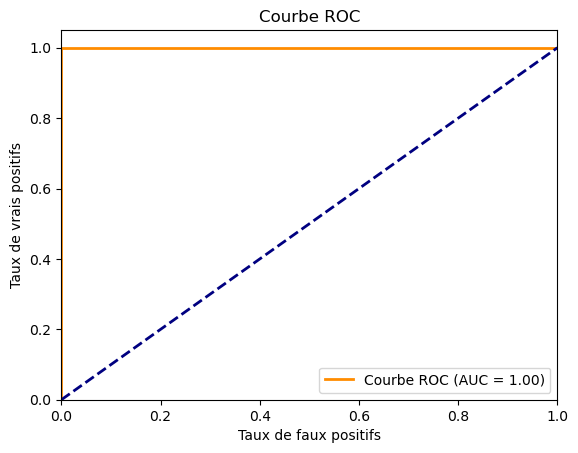

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Prédiction des probabilités sur l'ensemble de test
y_pred_proba = model.predict_proba(X_test)[:,1]

# Calcul de la courbe ROC et de l'aire sous la courbe (AUC)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()
